In [15]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#import the file sales_data from GitHub
df = pd.read_csv('https://raw.githubusercontent.com/hannserr/schulich_data_science/main/sales_data.csv?token=GHSAT0AAAAAACCN4V5A6FGTXQCKRDCETDVMZDLVL7Q')

In [6]:
#call the data set
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


The Price column is not very specific and could potentially be confused as price per unit instead of the order total, so I will rename it to Total Price.

In [10]:
#rename the Price column to Total Price and call dataset with change
df = df.rename(columns = {'Price' : 'Total Price'})
df

,Product,Region,Total Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [11]:
#get the info for the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      947 non-null    object 
 1   Region       946 non-null    object 
 2   Total Price  945 non-null    float64
 3   Units Sold   946 non-null    float64
 4   Sale Date    1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Observe that column 'Sale Date' does not have missing values, all other columns have many missing values.

In [17]:
#get description of the data set
df.describe()

,Total Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [16]:
#get description for the entire data set
df.describe(include = 'all')

,Product,Region,Total Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


Observations: 
              - There are 50 different product types and 10 different regions
              - The product that sold the most was Product_45 (28 times) and the region that sold the most was Region_9 (109 times)
              - The price mean = $107.60, but min = $0.2 and max = $2,143.30, so these are likely outliers
              - The price standard deviation is high, meaning that there is a large variability in prices
              - The mean number of units sold = 10.05, the min = 2, the max = 22, and the standard deviation = 3.17, meaning that there is a less spread-out distribution of products sold.


In [31]:
#replace the missing values in the Region column
df['Region'].fillna('Region_Unknown', inplace = True)

As we will be analyzing sales of products by region in order to give recommendations, I did not want to drop the rows that had missing values in the region column in order to keep the data set more complete.

In [32]:
#replace the missing values in the Product column
df['Product'].fillna('Product_Unknown', inplace = True)

As we will be analyzing sales of products by region in order to give recommendations, I did not want to drop the rows that had missing values in the product column in order to keep the data set more complete.

In [41]:
#replace the missing values in the Units Sold column with the average number of units sold per product category
df['Units Sold'].fillna(df.groupby('Product')['Units Sold'].transform('mean'))

0       10.0
1        8.0
2       12.0
3       10.0
4        6.0
        ... 
1045     8.0
1046     8.0
1047    11.0
1048     5.0
1049     8.0
Name: Units Sold, Length: 1050, dtype: float64

In [42]:
#replace the missing values in the Total Price column with the average price per product category
df['Total Price'].fillna(df.groupby('Product')['Total Price'].transform('mean'))

0        75.960000
1       175.780000
2        20.430000
3        12.770000
4       125.690000
           ...    
1045     78.690000
1046     90.580455
1047    114.370000
1048    104.001099
1049     69.300000
Name: Total Price, Length: 1050, dtype: float64

In [43]:
#call data set to ensure there are no more missing observations
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      1050 non-null   object 
 1   Region       1050 non-null   object 
 2   Total Price  1050 non-null   float64
 3   Units Sold   1050 non-null   float64
 4   Sale Date    1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


Now that the missing observations have all been filled in, we begin graphing to identify any outliers that may need to be removed.

<Axes: >

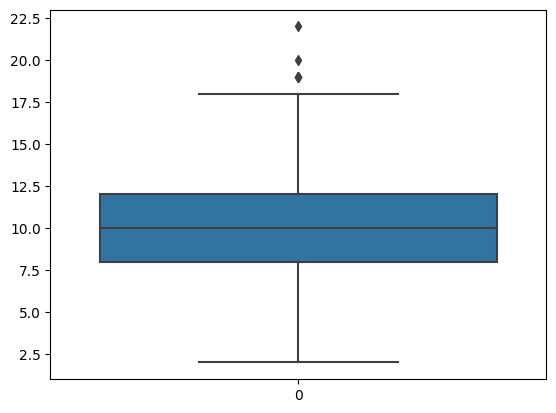

In [45]:
#start off with a boxplot of the Units Sold distribution
sns.boxplot(df['Units Sold'])

There are some obvious outliers starting just above 18 units sold. We will identify and then drop these values from the data set so that it is easier to analyze.

In [46]:
#identify the outliers in the Units Sold column 
df[df['Units Sold'] > 18]

,Product,Region,Total Price,Units Sold,Sale Date
221,Product_5,Region_5,50.36,20.0,2022-08-10
232,Product_14,Region_3,104.27,19.0,2022-08-21
719,Product_50,Region_4,86.73,22.0,2023-12-21
912,Product_22,Region_8,116.49,19.0,2024-07-01
962,Product_13,Region_7,0.61,19.0,2024-08-20


In [48]:
#drop the outliers in the Units Sold column
df.drop(df[df['Units Sold'] > 18].index, axis = 0, inplace = True)

<Axes: >

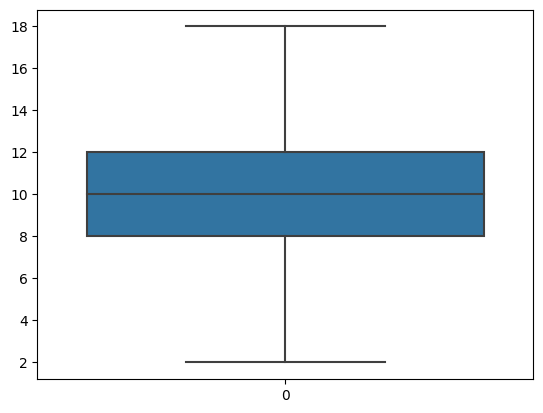

In [49]:
#re-create the boxplot without the outliers
sns.boxplot(df['Units Sold'])

The boxplot above is fairly symmetric, meaning that the distribution is normal. Around 50% of product orders are for between 8-12 units at a time.

<Axes: >

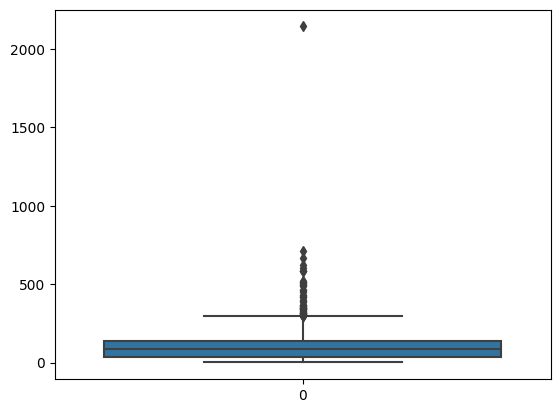

In [50]:
#next, create a boxplot of the Total Price distribution
sns.boxplot(df['Total Price'])

While there are a lot of outliers, many of them are very close together. The only obvious major outlier is somewhere above $2000, so we will identify this value and drop it. 

In [51]:
#identify the outlier in the Total Price column
df[df['Total Price'] > 2000]

,Product,Region,Total Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


In [52]:
#drop the outlier from the Total Price column 
df.drop(df[df['Total Price'] == 2143.3].index, axis = 0, inplace = True)

<Axes: >

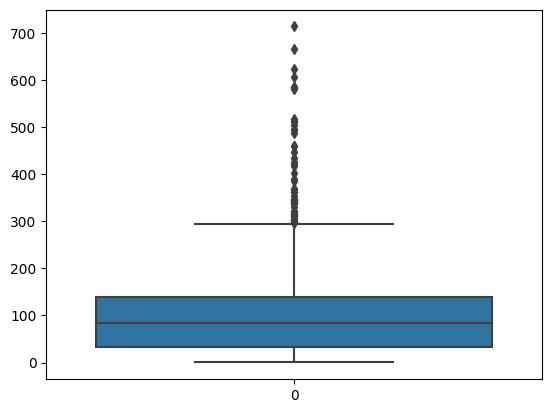

In [53]:
#re-create the boxplot without the outlier
sns.boxplot(df['Total Price'])

Now that the most obvious outlier has been removed, it is easier to visualize the Total Price data. While there are still many outliers, I do not want to remove too many of the observations as it helps to see the bigger picture and price is an important metric to consider when giving sales recommendations to the company. 

<Axes: xlabel='Units Sold', ylabel='Count'>

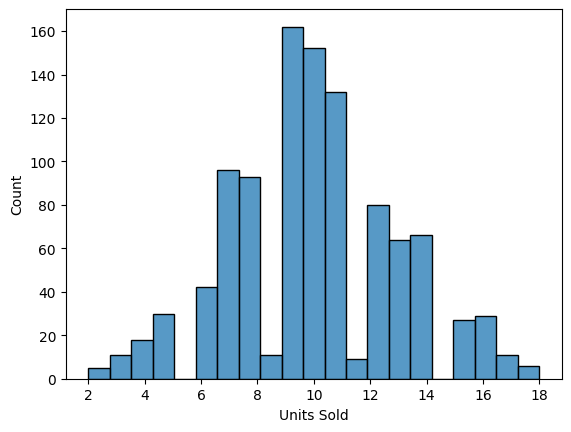

In [55]:
#continue to visualize the data by creating a histogram using Units Sold
sns.histplot(df['Units Sold'])

As seen in the histogram above, the company sells most of its products in bundles of about 9-11 units and a fair amount of products in bundles ranging from about 6-8 and 12-14 units. The company does not typically sell many products in very small bundles (2-5) or very large bundles (15-18).

<Axes: xlabel='Total Price', ylabel='Count'>

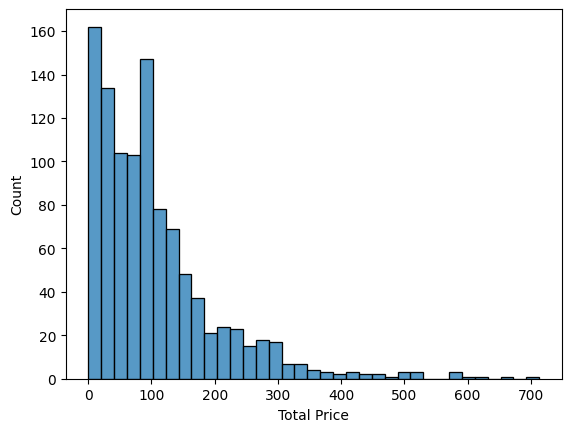

In [56]:
#create a histogram using Total Price
sns.histplot(df['Total Price'])

As seen in the histogram above, the total price of each product order typically ranges from just over $0 to about $100. After that, the distribution slopes downward, showing that the company receives less orders for products as the total price gets more expensive.

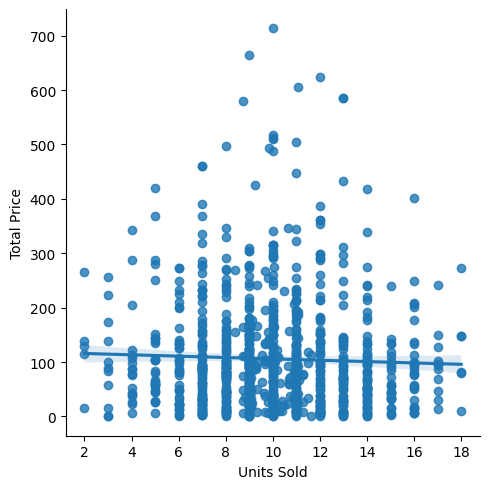

In [65]:
#next, create lmplot using the variables Units Sold and Total Price data to help visualize their relationship
sns.lmplot(data = df, x = 'Units Sold', y = 'Total Price', fit_reg = True)

The lmplot above shows results that support the observations from our previous models. The highest amount of sales occurred for orders with between 9-11 units (and to a lesser extent, 6-8 and 12-14 units), and these orders are most often for $100 or less. However, there are still an adequate amount of orders that had a total price between $100 and about $200. It can also be observed that the regression line has a very slight negative slope, meaning that the number of units per order has little effect on the average total price per order.

<Axes: xlabel='Units Sold', ylabel='Region'>

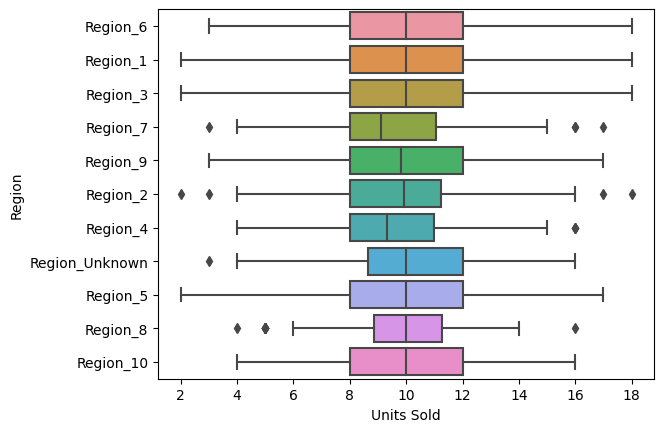

In [66]:
#create a boxplot using variables Units Sold and Region in order to visualize relationships between different groups of data
sns.boxplot(x = 'Units Sold', y = 'Region', data = df)

This model shows that the average number of units sold typically remains the same irrespective of the region, which is about 10 units per order. The only (slight) exceptions to this are region 7 and region 4, which both have an average number of 9 units per order. There are also several regions with outliers, however they are not overly significant and there is no single region that has a notably large number of outliers.

<Axes: xlabel='Total Price', ylabel='Product'>

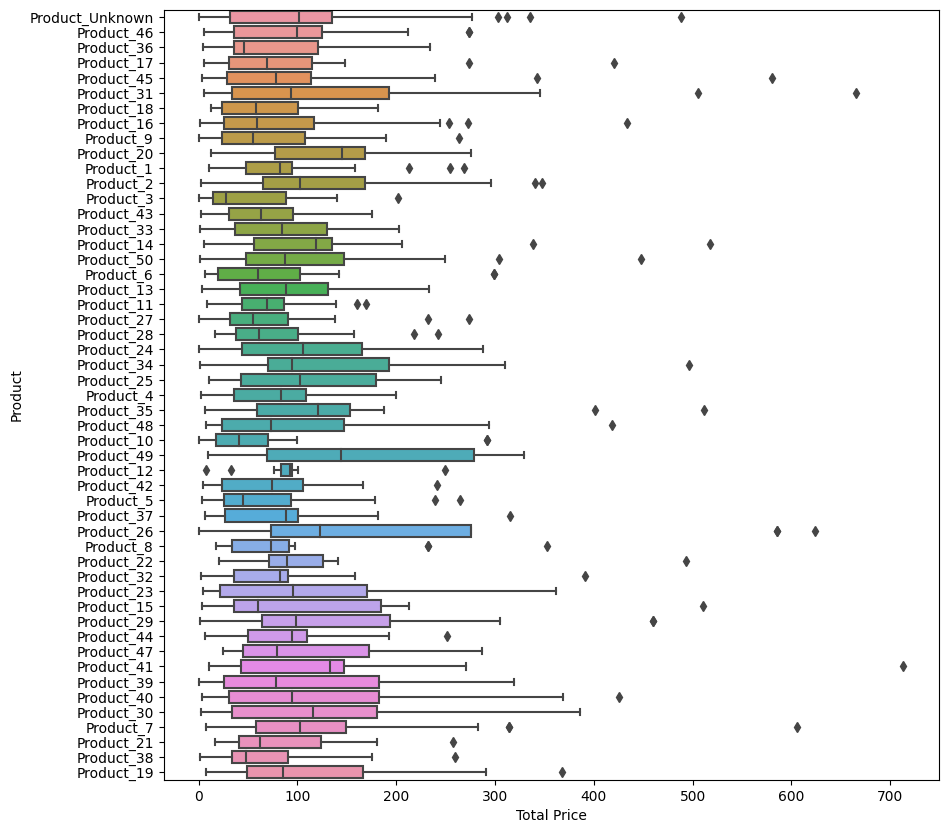

In [69]:
#next, create another boxplot using the variables Total Price and Product to further visualize data
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'Total Price', y = 'Product', data = df)

The boxplot above visualizes the relationship between the total price of the order and the product number. Many of the products have an average total price of around $100, which is similar to the mean of this data set. There are several products that have an average total price that is noticeably higher than other products. For example, products 20 and 49 have average total prices that are closer to $150. On the opposite end of the spectrum, there are products that have noticeably lower average total prices that are well under $100, such as products 3 and 10.

<Axes: xlabel='Region', ylabel='Total Price'>

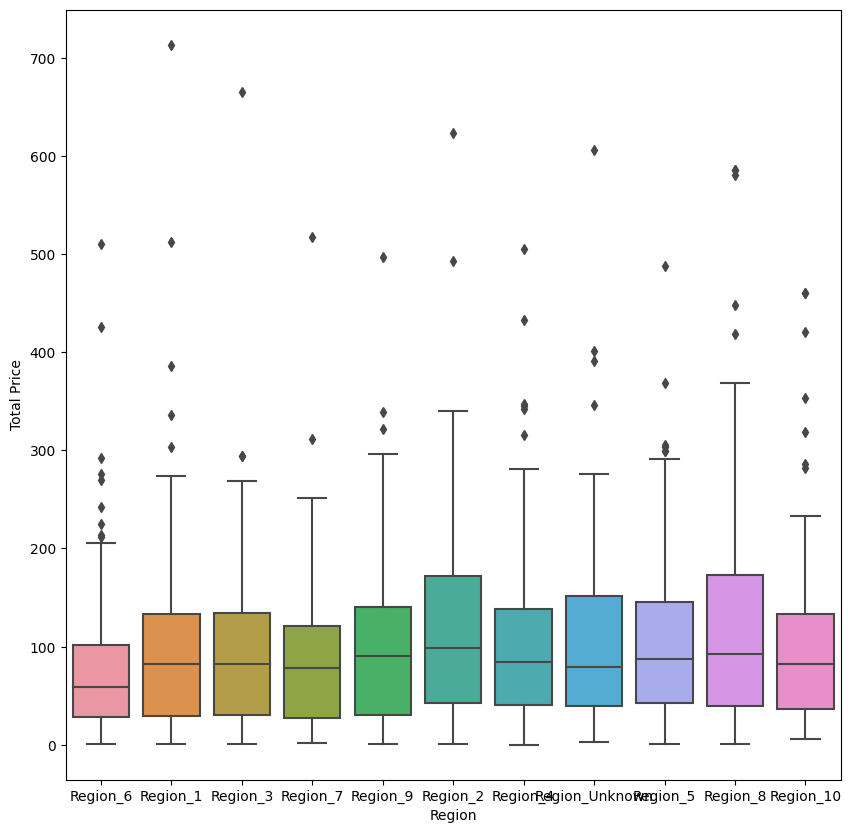

In [72]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Region', y = 'Total Price', data = df)